STUDENT NAME: UTTAM TAMANG
STUDENT ID: C0907669

IMPORTING NECESSARY PYTHON LIBRARY

In [737]:
# For Data Manipulation
import numpy as np
import pandas as pd

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

sns.set_theme(style='whitegrid',palette='hls')

#To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# For Model Training
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

DESCRIBE DATASET

In [738]:
# IMPORTING THE DATASET
happiness_df = pd.read_excel('happiness_dataset.xls', sheet_name=0)
pd.concat([happiness_df.head(),happiness_df.tail()])

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682
2198,Zimbabwe,2022,3.296220,7.670123,0.666172,54.525002,0.651987,-0.069513,0.752632,0.640609,0.191350


Meta Deta:

-> Country name: Contains name of the 165 five countries.

-> year: year column ranges from 2008 to 2022.

-> Life Ladder: Contains the happiness score on a scale of 0 to 10.

-> Log GDP per Capita: Contains the logged value of GDP per capita of countries.

-> Social Support: National average of the questions "If you were in trouble, do you have relatives or friends you can count on to help 
   you whenever you need them, or not?

-> Healthy Life Expectancy at birth: Number of years a person is expected to live at the time of birth.

-> Freedom to make life choicesNational a Average of the question “Are you satisfied or dissatisfied with your freedom to choose what you 
   do with your life?” -> GenerosityNational e average of the question "Have you donated money to a charity in a past few months

-> Perception of Corruption: National average of the question “Is corruption widespread throughout the government or no?t

-> Positive affect: average of three positive affect measures in GWP: laugh, enjoyment and doing interesting thing.

-> Negatice affect:the average of three negative affect measures in GW: worry, sadness and anger ”?"

In [739]:
# DESCRIBING DATASET
happiness_df.shape

(2199, 11)

The dataset have 11 features and 2199 observations.

In [740]:
# Renaming columns for ease of analysis
happiness_df.rename(columns={'Country name':'country','Life Ladder':'happiness_score','Log GDP per capita':'log_gdp_per_capita',
                            'Social support':'social_support','Healthy life expectancy at birth':'hle','Freedom to make life choices':'freedom',
                             'Generosity':'generosity','Perceptions of corruption':'corruption_perception','Positive affect':'positivity',
                            'Negative affect':'negativity'},inplace=True)

In [741]:
happiness_df.describe()

,year,happiness_score,log_gdp_per_capita,social_support,hle,freedom,generosity,corruption_perception,positivity,negativity
count,2199.000000,2199.000000,2179.000000,2186.000000,2145.000000,2166.000000,2126.000000,2083.000000,2175.000000,2183.000000
mean,2014.161437,5.479226,9.389766,0.810679,63.294583,0.747858,0.000096,0.745195,0.652143,0.271501
std,4.718736,1.125529,1.153387,0.120952,6.901104,0.140150,0.161083,0.185837,0.105922,0.086875
min,2005.000000,1.281271,5.526723,0.228217,6.720000,0.257534,-0.337527,0.035198,0.178886,0.082737
25%,2010.000000,4.646750,8.499764,0.746609,59.119999,0.656528,-0.112116,0.688139,0.571684,0.207660
50%,2014.000000,5.432437,9.498955,0.835535,65.050003,0.769821,-0.022671,0.799654,0.663063,0.260671
75%,2018.000000,6.309460,10.373216,0.904792,68.500000,0.859382,0.092070,0.868827,0.737936,0.322894
max,2022.000000,8.018934,11.663788,0.987343,74.474998,0.985178,0.702708,0.983276,0.883586,0.704590


In [742]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2199 non-null   object 
 1   year                   2199 non-null   int64  
 2   happiness_score        2199 non-null   float64
 3   log_gdp_per_capita     2179 non-null   float64
 4   social_support         2186 non-null   float64
 5   hle                    2145 non-null   float64
 6   freedom                2166 non-null   float64
 7   generosity             2126 non-null   float64
 8   corruption_perception  2083 non-null   float64
 9   positivity             2175 non-null   float64
 10  negativity             2183 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 189.1+ KB


In [743]:
happiness_df['year'] = pd.to_datetime(happiness_df['year'], format='%Y').dt.year

In [744]:
# HANDELLING MISSING VALUES
happiness_df.isnull().sum()

country                    0
year                       0
happiness_score            0
log_gdp_per_capita        20
social_support            13
hle                       54
freedom                   33
generosity                73
corruption_perception    116
positivity                24
negativity                16
dtype: int64

In [745]:
missing_df = happiness_df[happiness_df.isna().any(axis=1)]

In [746]:
gdp_from_google = np.array([25488.457,4336.87,31284,2213,29575,106,91,238,347,1245.15,
                            1071.78,1811.68,1600,3800000,34050000,33143,32756,3810,4053,6802.8])

log_gdp = np.log(gdp_from_google)
m = missing_df.log_gdp_per_capita.isna()
missing_df.loc[m,'log_gdp_per_capita'] = log_gdp
happiness_df = happiness_df.combine_first(missing_df)

In [747]:
sns.pairplot(happiness_df,kind='kde',dropna=True)
plt.show()

In [748]:
# since all of the distributions are skewed, we are going to use median to fill null values.
missing_features = happiness_df.columns[4:]
for col in missing_features:
    happiness_df[col].fillna(value=happiness_df[col].median(),inplace=True)

In [749]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2199 entries, 0 to 2198
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                2199 non-null   object 
 1   year                   2199 non-null   int32  
 2   happiness_score        2199 non-null   float64
 3   log_gdp_per_capita     2199 non-null   float64
 4   social_support         2199 non-null   float64
 5   hle                    2199 non-null   float64
 6   freedom                2199 non-null   float64
 7   generosity             2199 non-null   float64
 8   corruption_perception  2199 non-null   float64
 9   positivity             2199 non-null   float64
 10  negativity             2199 non-null   float64
dtypes: float64(9), int32(1), object(1)
memory usage: 197.6+ KB


In [750]:
happiness_df

,country,year,happiness_score,log_gdp_per_capita,social_support,hle,freedom,generosity,corruption_perception,positivity,negativity
0,Afghanistan,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195
1,Afghanistan,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092
2,Afghanistan,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324
3,Afghanistan,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175
4,Afghanistan,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919
...,...,...,...,...,...,...,...,...,...,...,...
2194,Zimbabwe,2018,3.616480,7.783066,0.775388,52.625000,0.762675,-0.051219,0.844209,0.657524,0.211726
2195,Zimbabwe,2019,2.693523,7.697755,0.759162,53.099998,0.631908,-0.047464,0.830652,0.658434,0.235354
2196,Zimbabwe,2020,3.159802,7.596050,0.717243,53.575001,0.643303,0.006313,0.788523,0.660658,0.345736
2197,Zimbabwe,2021,3.154578,7.656878,0.685151,54.049999,0.667636,-0.075575,0.756945,0.609917,0.241682


In [751]:
happiness_df.isna().sum()

country                  0
year                     0
happiness_score          0
log_gdp_per_capita       0
social_support           0
hle                      0
freedom                  0
generosity               0
corruption_perception    0
positivity               0
negativity               0
dtype: int64

DEFINE FEATURE & TARGET VARIABLE

PERMORMING EDA

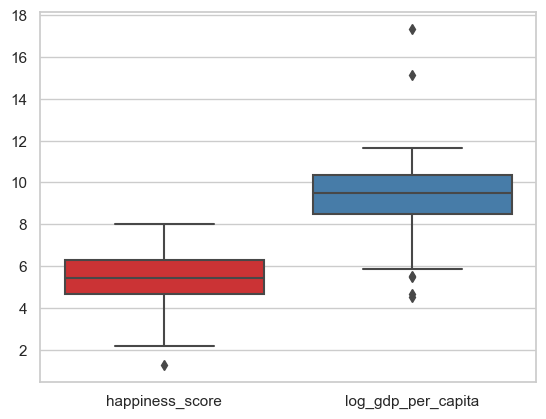

In [752]:
features = ['happiness_score','log_gdp_per_capita']
sns.boxplot(happiness_df.loc[:,features],orient='v',palette='Set1')
plt.show()

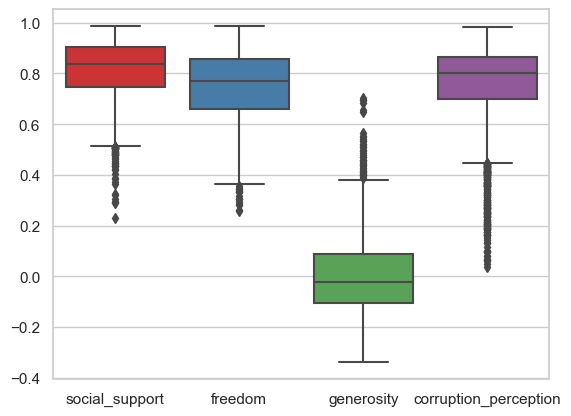

In [753]:
features=['social_support','freedom','generosity','corruption_perception']
sns.boxplot(happiness_df.loc[:,features],orient='v',palette='Set1')
plt.show()

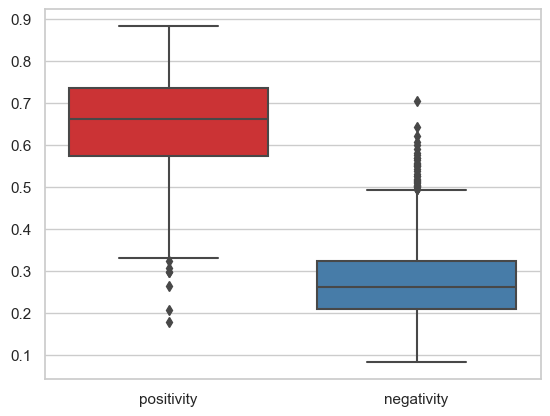

In [754]:
features = ['positivity','negativity']
sns.boxplot(happiness_df.loc[:,features],orient='v',palette='Set1')
plt.show()

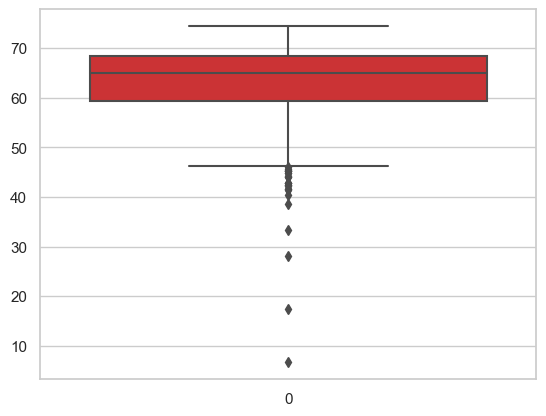

In [755]:
sns.boxplot(happiness_df.loc[:,'hle'],orient='v',palette='Set1')
plt.show()

In [756]:
# There's some outliers in almost all of the features. Now let's find the exact number of outliers
def outliers(data):
    Q1,Q3 = np.quantile(data,[0.25,0.75])
    IQR = Q3-Q1
    upper_limit = Q3 + 1.5*IQR
    lower_limit = Q1 - 1.5*IQR
    return data[(data>upper_limit) | (data<lower_limit)]

print('Number of Ouliers in each columns:')
columns = list(happiness_df.columns)[2:]
for col in columns:
    results = outliers(happiness_df[col].values)
    print(col,':',len(results))

Number of Ouliers in each columns:
happiness_score : 1
log_gdp_per_capita : 6
social_support : 53
hle : 26
freedom : 15
generosity : 40
corruption_perception : 214
positivity : 7
negativity : 34


In [757]:
# HANDELLING OUTLIERS
def outliers(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Remove outliers from the happiness_df dataframe
columns_to_remove_outliers = ['happiness_score', 'log_gdp_per_capita', 'social_support', 'hle', 'freedom', 'generosity', 'corruption_perception', 'positivity', 'negativity']
happiness_df = outliers(happiness_df, columns_to_remove_outliers)

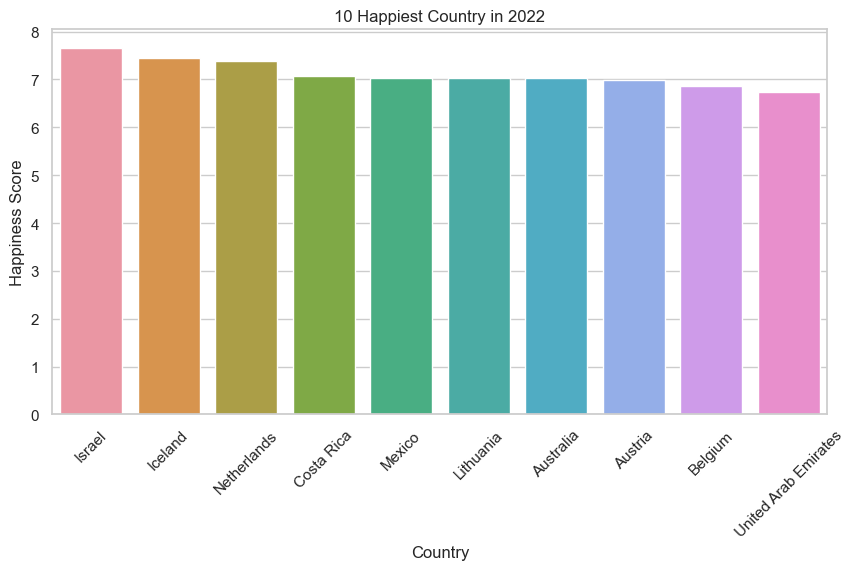

In [758]:
happiest_country = happiness_df[happiness_df['year']==2022].sort_values(by='happiness_score',ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='happiness_score',data=happiest_country.head(10),errorbar=None)
plt.title('10 Happiest Country in 2022')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Happiness Score')
plt.show()

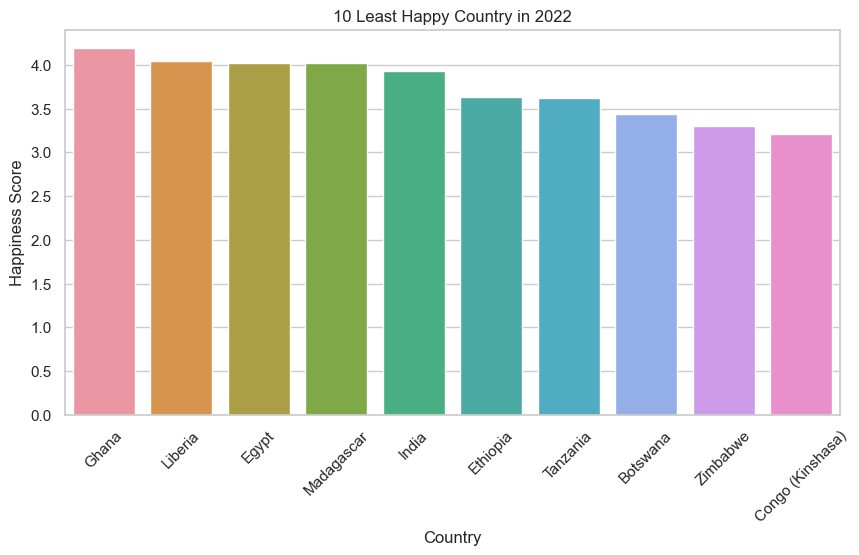

In [759]:
plt.figure(figsize=(10,5))
sns.barplot(x='country',y='happiness_score',data=happiest_country.tail(10),errorbar=None)
plt.title('10 Least Happy Country in 2022')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.ylabel('Happiness Score')
plt.show()

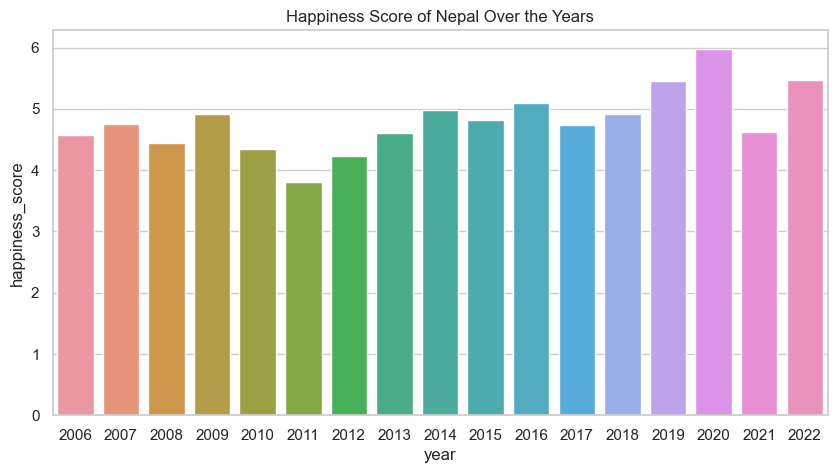

In [760]:
plt.figure(figsize=(10,5))
Nepal_happiness = happiness_df[happiness_df['country'] == 'Nepal']
plt.title('Happiness Score of Nepal Over the Years')
sns.barplot(data=Nepal_happiness, x='year',y='happiness_score')
plt.show()

In [761]:
fig = px.choropleth(happiness_df.sort_values(by='year'),
                    locations = 'country',
                    color = 'happiness_score',
                    locationmode = 'country names',
                    animation_frame = 'year')
fig.update_layout(title='Happiness Score Comparison By Countrty',autosize=False)
fig.show()

HEAT MAP

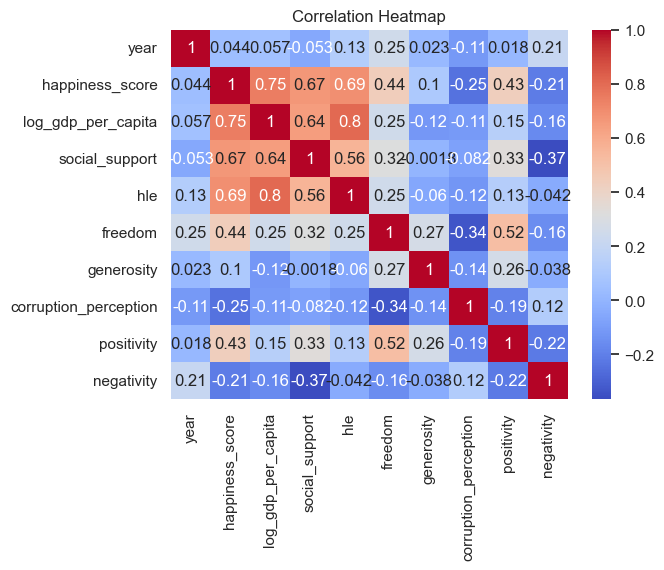

In [762]:
numerical_columns = happiness_df.select_dtypes(include=np.number)
sns.heatmap(numerical_columns.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

UTILIZING STANDARD SCALING

In [763]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Encode the "country" column
happiness_df['country_encoded'] = label_encoder.fit_transform(happiness_df['country'])

# Print the encoded DataFrame
print(happiness_df)

          country  year  happiness_score  log_gdp_per_capita  social_support  \
1     Afghanistan  2009         4.401778            7.508646        0.552308   
2     Afghanistan  2010         4.758381            7.613900        0.539075   
3     Afghanistan  2011         3.831719            7.581259        0.521104   
4     Afghanistan  2012         3.782938            7.660506        0.520637   
6     Afghanistan  2014         3.130896            7.670638        0.525568   
...           ...   ...              ...                 ...             ...   
2194     Zimbabwe  2018         3.616480            7.783066        0.775388   
2195     Zimbabwe  2019         2.693523            7.697755        0.759162   
2196     Zimbabwe  2020         3.159802            7.596050        0.717243   
2197     Zimbabwe  2021         3.154578            7.656878        0.685151   
2198     Zimbabwe  2022         3.296220            7.670123        0.666172   

            hle   freedom  generosity  

SPLITING DATA INTO TRAIN & TEST

In [764]:
happiness_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1821 entries, 1 to 2198
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   country                1821 non-null   object 
 1   year                   1821 non-null   int32  
 2   happiness_score        1821 non-null   float64
 3   log_gdp_per_capita     1821 non-null   float64
 4   social_support         1821 non-null   float64
 5   hle                    1821 non-null   float64
 6   freedom                1821 non-null   float64
 7   generosity             1821 non-null   float64
 8   corruption_perception  1821 non-null   float64
 9   positivity             1821 non-null   float64
 10  negativity             1821 non-null   float64
 11  country_encoded        1821 non-null   int32  
dtypes: float64(9), int32(2), object(1)
memory usage: 170.7+ KB


In [765]:
happiness_df = happiness_df.drop('country', axis=1)


In [766]:
# Standardize the happiness_df DataFrame
happiness_df_standardized = pd.DataFrame(StandardScaler().fit_transform(happiness_df), columns=happiness_df.columns)


In [774]:
happiness_df_standardized

,year,happiness_score,log_gdp_per_capita,social_support,hle,freedom,generosity,corruption_perception,positivity,negativity,country_encoded
0,-1.102000,-1.027541,-1.732745,-2.549474,-2.076887,-0.473470,1.568683,0.493744,-1.648553,-0.444810,-1.742730
1,-0.888925,-0.666956,-1.632788,-2.678190,-2.027156,-1.091700,1.068193,-0.827908,-1.299346,0.041652,-1.742730
2,-0.675850,-1.603966,-1.663786,-2.852994,-1.977424,-1.909729,1.372518,-0.603350,-1.664168,-0.062039,-1.742730
3,-0.462775,-1.653293,-1.588527,-2.857535,-1.927693,-1.634763,1.905585,-0.192736,-0.348655,-0.052566,-1.742730
4,-0.036624,-2.312616,-1.578905,-2.809566,-1.828230,-1.810737,0.956121,0.689373,-1.547983,1.308176,-1.742730
...,...,...,...,...,...,...,...,...,...,...,...
1816,0.815677,-1.821609,-1.472134,-0.379645,-1.774354,0.184076,-0.174413,0.439992,0.084450,-0.767579,1.713783
1817,1.028752,-2.754873,-1.553152,-0.537472,-1.695613,-0.842267,-0.147366,0.314932,0.093406,-0.466926,1.713783
1818,1.241827,-2.283387,-1.649739,-0.945211,-1.616871,-0.752829,0.239938,-0.073707,0.115296,0.937593,1.713783
1819,1.454902,-2.288669,-1.591972,-1.257361,-1.538130,-0.561847,-0.349820,-0.365008,-0.384039,-0.386413,1.713783


In [775]:
# split the data into input and output variables
X=happiness_df_standardized.drop('happiness_score', axis=1) # independent variable
y=happiness_df_standardized['happiness_score'] # dependent variable

In [776]:
# Split the dataset into train and test data
X_train, X_test, y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=25)

X_train.shape, X_test.shape, y_train.shape,y_test.shape

((1456, 10), (365, 10), (1456,), (365,))

In [777]:
# convert the dataframe into numpy array
X_train=np.array(X_train)
X_test=np.array(X_test)

PERFORMING LINEAR REGRESSION


In [778]:
from sklearn.metrics import mean_squared_error
# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

In [779]:
# CALCULATING THE MEAN SQUARED ERROR
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mse


0.28826162088981083

In [780]:
# Make predictions using the trained model
y_pred = model.predict(X_test)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)

# Calculate the accuracy (R-squared score)
accuracy = 1 - mse / np.var(y_test)

accuracy


0.72089187301364